In [28]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crypto Analysis

Crypto is a highly volitile market and any method of prediction and categorization that can be used would be beneficial.  Using machine learning to seperate them into different cagories would be a scientific way of seperating them to try to make sense of a complicated issue and explore benefits of different cryptocurrencies.  To achieve this a k-means algorithm will be applied to a collection of cryptocurrencies which may interest investors

In [10]:
path = 'crypto_data.csv'
crypto_df = pd.read_csv(path)
len(crypto_df)


1252

To avoid finding patterns in cryptos that are not traded we will drop all cryptos that are not traded.  and we are taking particular interest in mined cryptocurrencies since those have more potential methods of acquisition and are less likely to be scams.

In [11]:
crypto_df = crypto_df.loc[crypto_df['IsTrading']].drop(labels='IsTrading',axis=1)
len(crypto_df)

1144

In [12]:
mined_df = crypto_df.dropna(axis=0, subset=['TotalCoinsMined'])
mined_df =crypto_df.loc[crypto_df['TotalCoinsMined']>0]

len(mined_df)

532

In [13]:
training_df = mined_df.drop(labels=['CoinName','Unnamed: 0'],axis=1)
training_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [14]:
training_df= pd.get_dummies(training_df)
training_df.head()

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dummy look
It seems like this method of making dummy variables is suboptimal considering the likeness of many proof and alorithm types with different names

In [22]:
len(training_df)
training_df.head()

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Variable reduction and scaling
PCA and t-SNE algorithms are used to reduce the number of components the model is being trained on to a more managable level from the 377 initially.
to get the most out of these algorithms the non binary variables are being scaled first, in this case using a power scaling formula to preserve as much varience from them as possible without it outweighing other variables

In [24]:
scaler = PowerTransformer().fit(training_df)
X_train_scaled = scaler.transform(training_df)
X_train_scaled.shape

(532, 377)

In [25]:
pca_fit = PCA(n_components=0.90)
crypto_training_pca = pca_fit.fit_transform(X_train_scaled)
crypto_training_pca.shape

(532, 274)

In [33]:
crypto_training_pca_df = pd.DataFrame(crypto_training_pca)

In [29]:
tsne= TSNE(learning_rate=35)


In [36]:


crypto_pca_tsne_features = tsne.fit_transform(crypto_training_pca_df)
crypto_pca_tsne_features.shape

(532, 2)

# Model training
Now that the data has been reduced to a 2 feature array a k-means algorithm can be used to attempt to cluster the data into an different categories

c:\Users\zzpie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


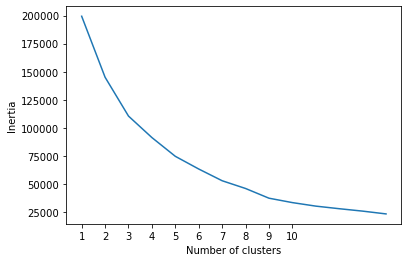

In [38]:
inertia = []

k = list(range(1,15))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Analysis on Clusters

After clustering the data in up to 15 clusters it appoears as though it can be clustered although some refinement on scaling and reduction should probably be done before choosing a specific model.  If a choice was made exclusively with these methods of data preprocessing I would reccomend 7 ± 2 clusters to work with.  